In [ ]:
'''
모든 문제를 풀기전에 아래 코드를 실행해주세요.
'''

'\n모든 문제를 풀기전에 아래 코드를 실행해주세요.\n'

In [ ]:
# 데이터 분석 및 시각화에 필요한 기본 라이브러리들을 가져옵니다.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Scikit-learn 라이브러리에서 필요한 모듈들을 불러옵니다.
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

# TensorFlow Keras 라이브러리를 불러옵니다.
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
'''
[문제01] Scikit-learn은 머신러닝을 위한 다양한 도구를 제공하는 핵심 라이브러리입니다. sklearn.preprocessing 모듈에서 RobustScaler 클래스를 임포트하는 코드를 작성하세요.
'''

'\n[문제01] Scikit-learn은 머신러닝을 위한 다양한 도구를 제공하는 핵심 라이브러리입니다. sklearn.preprocessing 모듈에서 RobustScaler 클래스를 임포트하는 코드를 작성하세요.\n'

In [ ]:
from sklearn.preprocessing import RobustScaler

In [ ]:
'''
[문제02] AI모델링을 위해 분석할 데이터를 준비하고 결측치 현황을 파악하려고 합니다. 아래 가이드에 따라 코드를 작성하세요.
- Pandas의 read_csv 함수를 사용하여 3_employee_salary.csv 파일을 읽어 데이터프레임 변수 emp_df에 할당하세요.
- isnull() 과 sum() 함수를 사용하여 emp_df의 컬럼별 결측치 개수를 확인하세요.
'''

In [ ]:
emp_df = pd.read_csv("data/3_employee_salary.csv")
emp_df.isnull().sum()

department            23
experience_years       0
education_level        0
position              31
performance_score     22
projects_completed    27
team_size             21
training_hours         0
language_skill         0
salary_krw             0
dtype: int64

In [ ]:
'''
[문제03] 직원의 경력(experience_years)과 연봉(salary_krw)의 관계를 시각적으로 탐색하고자 합니다. seaborn의 jointplot을 사용하여 두 변수간의 관계를 산점도와 히스토그램으로 함께 나타내세요.
- x축 : experience_years
- y축 : salary_krw
- 데이터 : emp_df
- 추가옵션 : kind = 'reg'를 사용하여 산점도와 함께 회귀선을 표시
'''

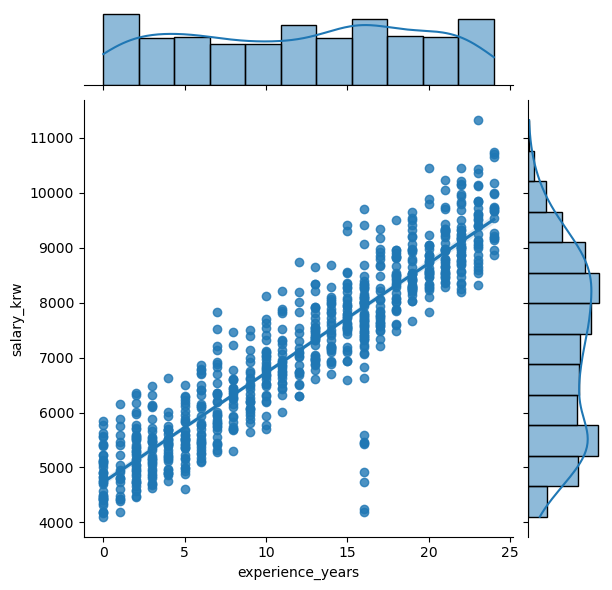

In [ ]:
sns.jointplot(data=emp_df, x='experience_years', y='salary_krw', kind='reg')

In [ ]:
'''
[문제04] 직급(position)에 따른 직원분포 확인하려고 합니다. seaborn의 countplot을 사용하여 position 컬럼의 각 값들이 몇번 나타나는지 시각화하세요.
- x축 : position
- y축 : emp_df
- 추가옵션 : 직급 순서(order)를 ['사원','대리','과장','팀장']으로 지정해서 표시
'''

In [ ]:
import platform
from matplotlib import rc

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
else:
    rc('font', family='Malgun Gothic')

plt.rcParams['axes.unicode_minus'] = False

In [ ]:
print(emp_df['position'])

In [ ]:

sns.countplot(x='position', y='emp_df')